Import dataset, coverting categorical and ordinal predictor variables data to dummy variables:

In [2]:
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the data from Google Drive:
drive.mount('/content/drive')
file_path ='/content/drive/MyDrive/Data Mining 2/heart.csv'
data = pd.read_csv(file_path)

data_dummies = pd.get_dummies(data.drop('HeartDisease', axis=1), drop_first=True)
data_dummies['HeartDisease'] = data['HeartDisease']

# Separating the predictor variables and target variable:
X = data_dummies.drop('HeartDisease', axis=1)
y = data_dummies['HeartDisease']

Mounted at /content/drive


Performing Rank 2 PCA:

In [3]:
# Standardizing the data:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Performing PCA:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Performing rank 2 t-SNE and NMF:

In [4]:
from sklearn.manifold import TSNE

# Performing rank 2 t-SNE:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

from sklearn.decomposition import NMF

# Changing the range of predictor values with negative values:
min_value = X.min().min()
X_shifted = X + abs(min_value) if min_value < 0 else X

# Performing NMF:
nmf = NMF(n_components=2, init='random', random_state=42)
W = nmf.fit_transform(X_shifted)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


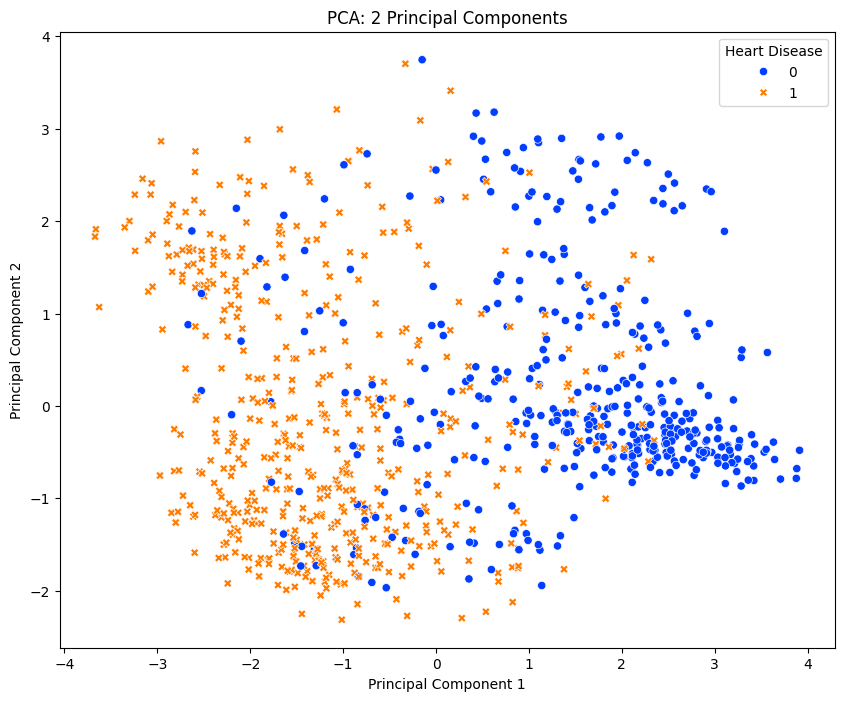

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conversion to a DataFrame to easily plot using Seaborn:
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['HeartDisease'] = y

# Plotting the PCA results:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='HeartDisease', style='HeartDisease', palette='bright')
plt.title('PCA: 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease')
plt.show()

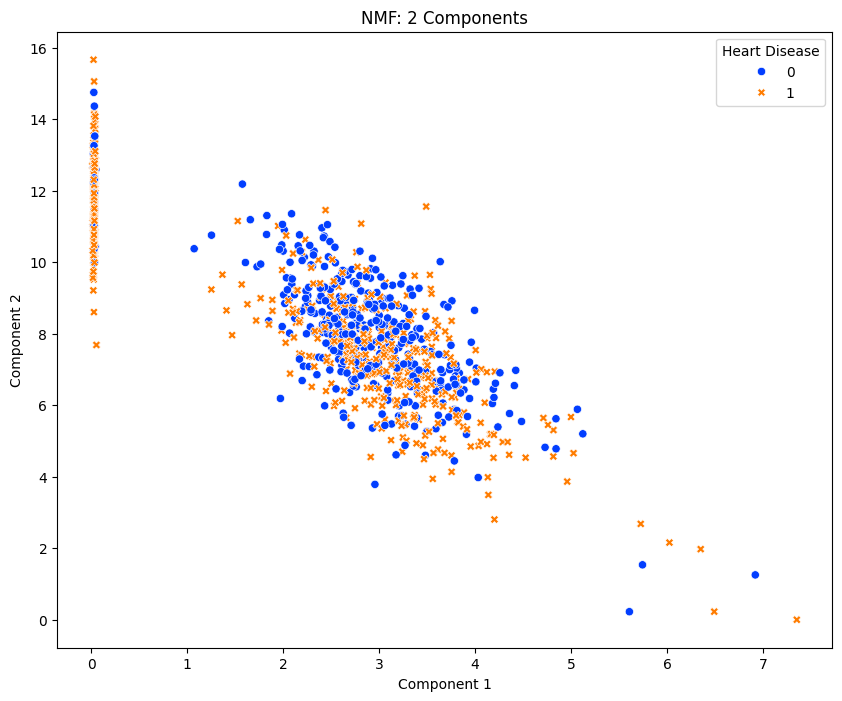

In [6]:
W_df = pd.DataFrame(W, columns=['Component 1', 'Component 2'])
W_df['HeartDisease'] = y

# Plot Non-negative Matrix Factorization results:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=W_df, x='Component 1', y='Component 2', hue='HeartDisease', style='HeartDisease', palette='bright')
plt.title('NMF: 2 Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Heart Disease')
plt.show()

In conclusion:

PCA allows for a straightforward and computationally efficient way to reduce the dimensionality of the data, preserving as much variance as possible. The PCA scatter plot shows some degree of class separation, though it is far from perfect. It was also able to provide a quick overview of the main variance in the data, which can be valuable for initial explorations.

Non-negative Matrix Factorization (NMF) offers a parts-based decomposition that can provide additional insights, especially when components have a meaningful interpretation. The scatter plot from NMF shows how observations are composed of the basis vectors, potentially highlighting different patterns of heart disease presence.

Therefore, I would say that PCA stood out for its balance of simplicity and effectiveness, making it particularly valuable for initial data exploration.
